In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [166]:
frozen_lake_VI_csv_list = ['out/value-iteration-(30, 30)-epsilon-0.001-gamma-0.8.csv',
            'out/value-iteration-(30, 30)-epsilon-0.001-gamma-0.9.csv',
            'out/value-iteration-(30, 30)-epsilon-0.001-gamma-0.95.csv',
            'out/value-iteration-(30, 30)-epsilon-0.001-gamma-0.99.csv']
frozen_lake_PI_csv_list = ['out/policy-iteration-(30, 30)-epsilon-0.001-gamma-0.8.csv',
            'out/policy-iteration-(30, 30)-epsilon-0.001-gamma-0.9.csv',
            'out/policy-iteration-(30, 30)-epsilon-0.001-gamma-0.95.csv',
            'out/policy-iteration-(30, 30)-epsilon-0.001-gamma-0.99.csv']
forest_VI_csv_list = ['out/value-iteration-forest-numStates-10-gamma-0.8.csv',
                           'out/value-iteration-forest-numStates-10-gamma-0.9.csv',
                           'out/value-iteration-forest-numStates-10-gamma-0.95.csv',
                           'out/value-iteration-forest-numStates-10-gamma-0.99.csv']
forest_PI_csv_list = ['out/policy-iteration-forest-numStates-10-gamma-0.8.csv',
                           'out/policy-iteration-forest-numStates-10-gamma-0.9.csv',
                           'out/policy-iteration-forest-numStates-10-gamma-0.95.csv',
                           'out/policy-iteration-forest-numStates-10-gamma-0.99.csv']
forest_QL_csv_list = ['out/ql-forest-decaytype-1.csv', 
                      'out/ql-forest-decaytype-2.csv',
                      'out/ql-forest-decaytype-3.csv']


In [61]:
df = pd.read_csv(csv_list[0])

In [69]:
df

,env_name,algname,gamma,epsilon,threshold,Iteration,V_variation,V_delta,V_max_diff,V_average,V_sum,clock_time,# chg action at iter,# chg actions
0,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,1,0.890000,1.780000,0.890000,0.004200,3.780000,0.010595,2,2
1,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,2,0.781100,3.124400,0.781100,0.007672,6.904400,0.014947,4,6
2,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,3,0.673289,2.693156,0.673289,0.010664,9.597556,0.019056,4,10
3,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,4,0.566556,2.266224,0.566556,0.013182,11.863780,0.023403,4,14
4,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,5,0.460891,2.304453,0.460891,0.015742,14.168233,0.027516,5,19
5,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,6,0.356282,2.493972,0.356282,0.018514,16.662205,0.031721,6,25
6,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,7,0.252719,2.021751,0.252719,0.020760,18.683955,0.036303,7,32
7,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,8,0.150192,0.901150,0.150192,0.021761,19.585105,0.041610,6,38
8,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,9,0.048690,0.438208,0.048690,0.022248,20.023313,0.046845,8,46
9,"frozen-lake-(30, 30)",VI,0.99,0.001,0.00001,10,0.000000,0.000000,0.000000,0.022248,20.023313,0.051174,0,46


In [143]:
def plot_results(problem_name, alg_name, csv_list, x_col_name, y_col_name, x_label, y_label, label_col = None, show_convergence=True):
    plt.style.use('seaborn')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    num_x_ticks = 0
    for csv in csv_list:
        df = pd.read_csv(csv)
        if label_col:
            label = label_col+ ": " + str(df[label_col][0])
        plt.plot(df[x_col_name], df[y_col_name], label=label)
        if show_convergence:
            plt.plot(df[x_col_name].iat[-1], df[y_col_name].iat[-1], 'g*')
        if df.shape[0]> num_x_ticks:
            num_x_ticks=df.shape[0]
            ax.set_xticks(df[x_col_name])
        plt.legend()
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(problem_name + ": "+alg_name + '-' +y_label + ' vs ' + x_label)

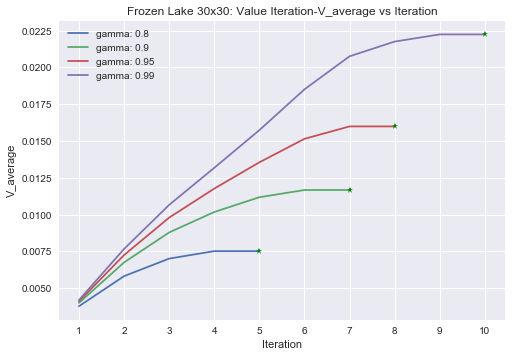

In [133]:
plot_results('Frozen Lake 30x30', 'Value Iteration', frozen_lake_VI_csv_list, 'Iteration', 
             'V_average', 'Iteration', 'Average reward', label_col = 'gamma', show_convergence=True)

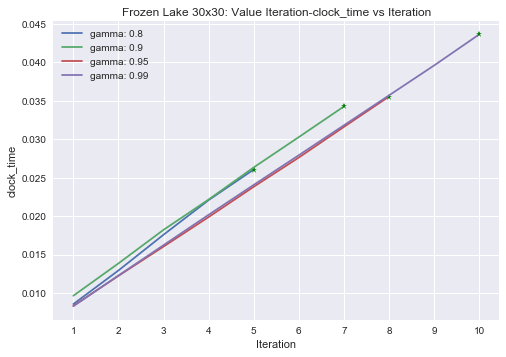

In [134]:
plot_results('Frozen Lake 30x30', 'Value Iteration', frozen_lake_VI_csv_list, 'Iteration', 
             'clock_time', 'Iteration', 'Time', label_col = 'gamma', show_convergence=True)

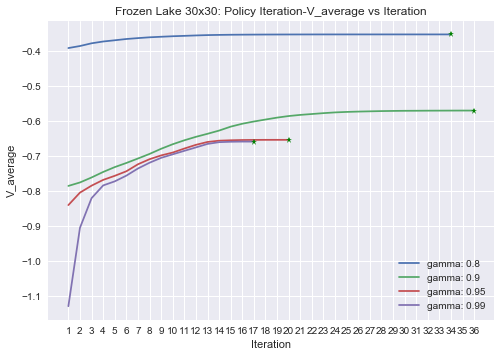

In [135]:
plot_results('Frozen Lake 30x30', 'Policy Iteration', frozen_lake_PI_csv_list, 'Iteration', 
             'V_average', 'Iteration', 'Average reward', label_col = 'gamma', show_convergence=True)

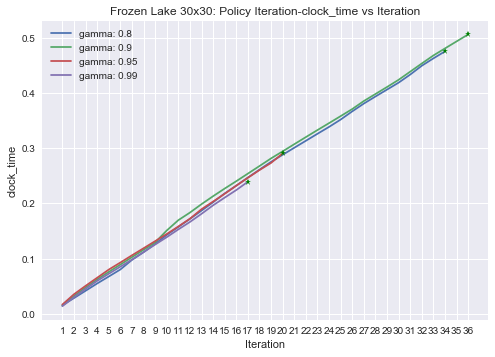

In [136]:
plot_results('Frozen Lake 30x30', 'Policy Iteration', frozen_lake_PI_csv_list, 'Iteration', 
             'clock_time', 'Iteration', 'Time', label_col = 'gamma', show_convergence=True)

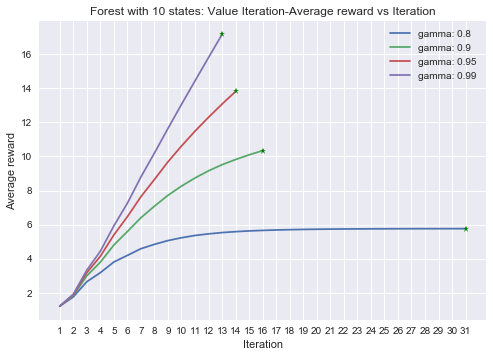

In [144]:
plot_results('Forest with 10 states', 'Value Iteration', forest_VI_csv_list, 'Iteration', 
             'V_average', 'Iteration', 'Average reward', label_col = 'gamma', show_convergence=True)

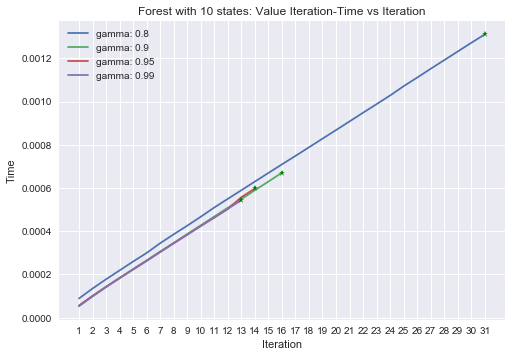

In [145]:
plot_results('Forest with 10 states', 'Value Iteration', forest_VI_csv_list, 'Iteration', 
             'clock_time', 'Iteration', 'Time', label_col = 'gamma', show_convergence=True)

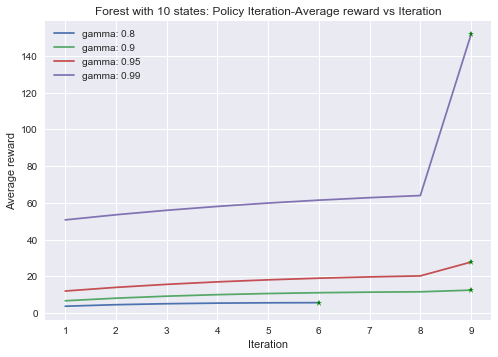

In [146]:
plot_results('Forest with 10 states', 'Policy Iteration', forest_PI_csv_list, 'Iteration', 
             'V_average', 'Iteration', 'Average reward', label_col = 'gamma', show_convergence=True)

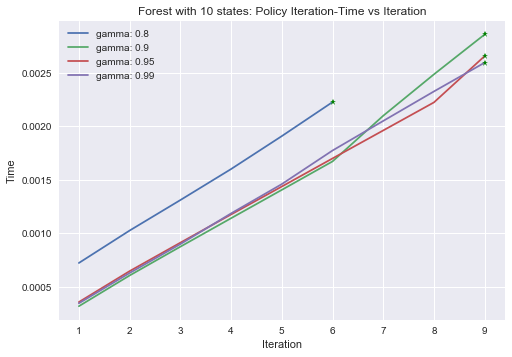

In [147]:
plot_results('Forest with 10 states', 'Policy Iteration', forest_PI_csv_list, 'Iteration', 
             'clock_time', 'Iteration', 'Time', label_col = 'gamma', show_convergence=True)

In [157]:
df=pd.read_csv('out/ql-forest-decaytype-1.csv')
df

,episode,V_average,V_sum,time,epsilon
0,1,2.771360,8.314080,0.003076,0.216679
1,2,3.748980,11.246939,0.006064,0.188562
2,3,4.608954,13.826863,0.009019,0.175220
3,4,5.244237,15.732710,0.012376,0.166835
4,5,5.803518,17.410554,0.015410,0.160859
...,...,...,...,...,...
95,96,11.690323,35.070969,0.304014,0.109056
96,97,11.700755,35.102265,0.307037,0.108933
97,98,11.710080,35.130241,0.310011,0.108811
98,99,11.723748,35.171245,0.313185,0.108691


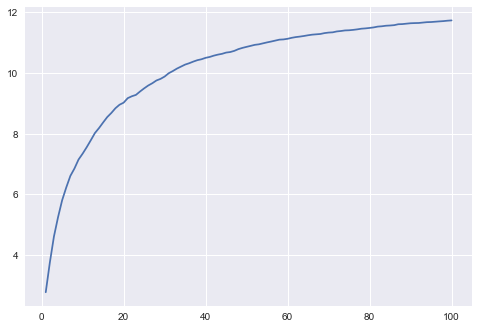

In [158]:
plt.plot(df['episode'], df['V_average'])

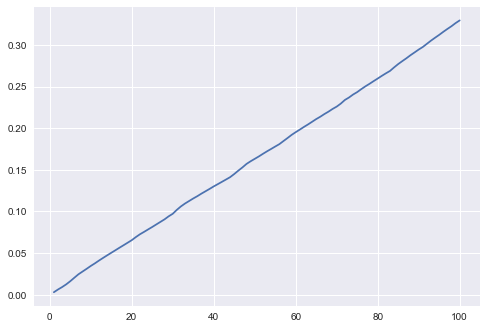

In [150]:
plt.plot(df['episode'], df['time'])

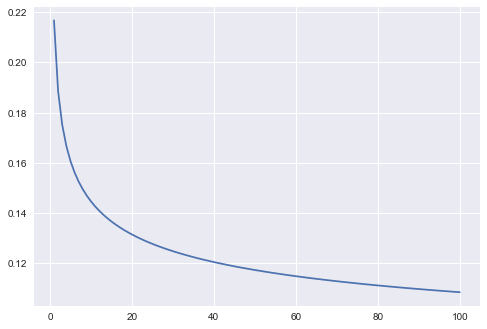

In [153]:
plt.plot(df['episode'], df['epsilon'])

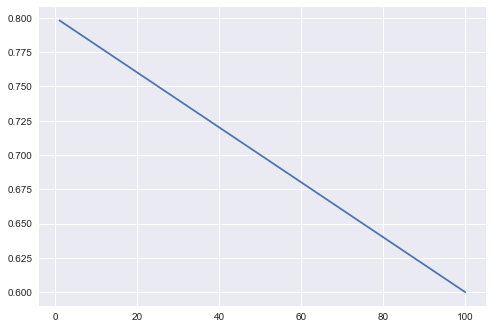

In [161]:
df2=pd.read_csv('out/ql-forest-decaytype-2.csv')
plt.plot(df2['episode'], df2['epsilon'])

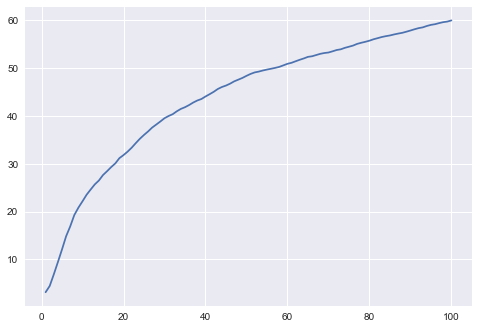

In [162]:
plt.plot(df2['episode'], df2['V_average'])

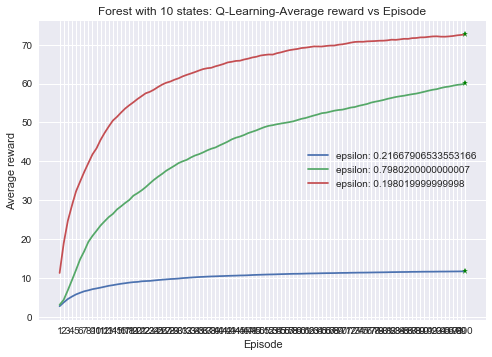

In [168]:
plot_results('Forest with 10 states', 'Q-Learning', forest_QL_csv_list, 'episode', 
             'V_average', 'Episode', 'Average reward', label_col = 'epsilon', show_convergence=True)

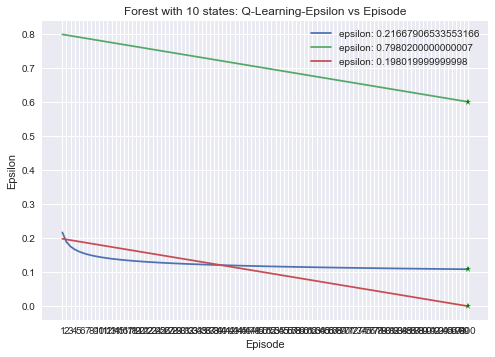

In [167]:
plot_results('Forest with 10 states', 'Q-Learning', forest_QL_csv_list, 'episode', 
             'epsilon', 'Episode', 'Epsilon', label_col = 'epsilon', show_convergence=True)